In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

## Training models

In [4]:
def plt_confusion_matrix(cm, normalize=False, labels=None, title='Confusion matrix', cmap=plt.cm.Blues, ax=None):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print()
    if labels is not None:
        d = {index: label for index, label in enumerate(labels)}
        print('Index and Its Corresponding Label:')
        print(d)
        print()
    if ax is None:
        ax = plt.gca()
    sb.heatmap(cm, cmap=cmap, annot=True, fmt='d', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predict')
    ax.set_ylabel('Actual')
    plt.tight_layout()

## Random Forest Classifier

Random Forest is an advanced usage of Decision Tree.

#### Recall about Decision Tree

Decision Tree is a method of classification which makes use of a tree with each node describing a condition about some features. When it is trained, all of the samples are passed in and the classification is decided based on gini score. When a sample is passed in for testing, it is compared with each node until it reaches a leaf, from which the classification is decided.

#### How does Random Forest work?

Random Forest makes use of multiple Decision Trees. First of all, the algorithm bootstraps a number of samples and features for each tree. In other words, it selects some samples and features RANDOMLY for training each tree. When a sample is used for testing, it is classified independently by every single tree. Then the classification is aggregated by voting for the majority result. This method of bootstrapping and aggregating is called BAGGING.

#### How to evaluate its accuracy?

Typically, there are a number of samples that is not included in the bootstrapping. They are called Out-of-Bag dataset. The accuracy of a Random Forest model is measured by the proportion of Out-of-Bag samples that were correctly classified by the model.

#### How to optimize its accuracy?

We can try to increase the accuracy score by tuning the hyperparameters. For example, we can decide on the number of trees so that the algorithm can create for training.

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


--------------TEST DATASET---------------
ACCURACY: 0.8976150325222838
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       488
      Normal_Weight       0.86      0.90      0.88       615
     Obesity_Type_I       0.91      0.87      0.89       591
    Obesity_Type_II       0.96      0.97      0.97       656
   Obesity_Type_III       1.00      1.00      1.00       794
 Overweight_Level_I       0.81      0.74      0.77       532
Overweight_Level_II       0.75      0.79      0.77       475

           accuracy                           0.90      4151
          macro avg       0.89      0.89      0.89      4151
       weighted avg       0.90      0.90      0.90      4151

Confusion matrix, without normalization

Index and Its Corresponding Label:
{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Lev

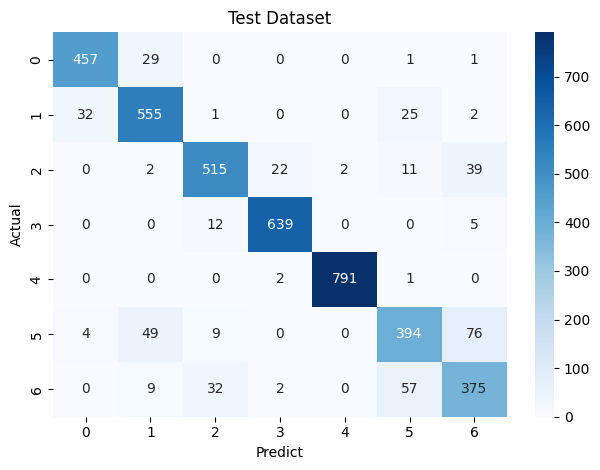

In [15]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")

clf = RandomForestClassifier(n_estimators=198, random_state=42)
clf.fit(X_train, y_train)
labels_clf = clf.classes_

print('--------------TEST DATASET---------------')

print("ACCURACY:", clf.score(X_test, y_test))
y_test_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

cm_clf_test = confusion_matrix(y_test, y_test_pred)
plt_confusion_matrix(cm_clf_test, title='Test Dataset', labels=labels_clf)

As shown, the model has a high accuracy in predicting the target from the dataset